In [17]:
import numpy as np
import matplotlib.pyplot as plt
import TopHat as th
from PIL import Image
import Binarizacion as ot
import ComponentesConexos as cc

In [18]:
# To Process
ruta = 'drive/DRIVE/training/images/39_training.tif'
img = Image.open(ruta).convert("L")
img_array = np.array(img)

# Ground Truth
gt_ruta = 'drive/DRIVE/training/1st_manual/39_manual1.gif'
gtim = Image.open(gt_ruta).convert("L")
gt_array = np.array(gtim)

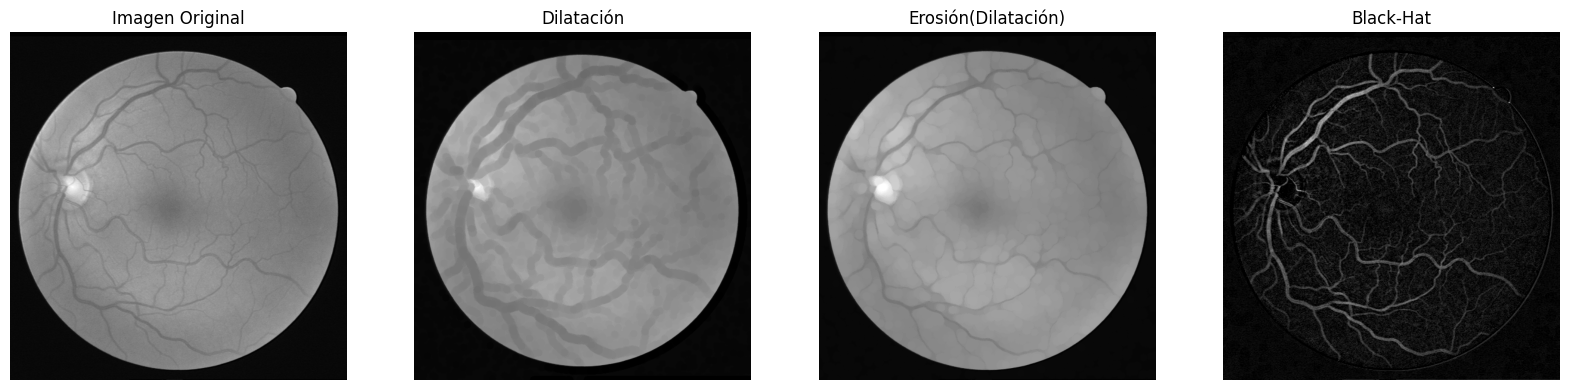

In [27]:
kernel1 = th.crea_kernel(13)
TopHat = th.BlackHat(img_array, kernel1)
erode = th.erosion(img_array, kernel1)
opened = th.dilatacion(erode, kernel1)

names2 = ["Imagen Original", "Dilatación", "Erosión(Dilatación)", "Black-Hat"]

th.vistas(img_array, erode, opened, TopHat, names2)

El umbral fue 8.


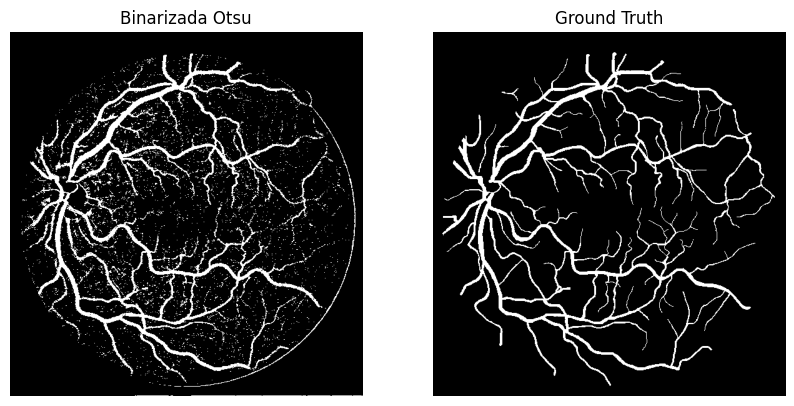

In [28]:
binarizada = ot.otsu_threshold(TopHat)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(binarizada, cmap='gray')
ax[0].set_title("Binarizada Otsu")
ax[0].axis('off')

ax[1].imshow(gt_array, cmap='gray')
ax[1].set_title("Ground Truth")
ax[1].axis('off')

plt.show()

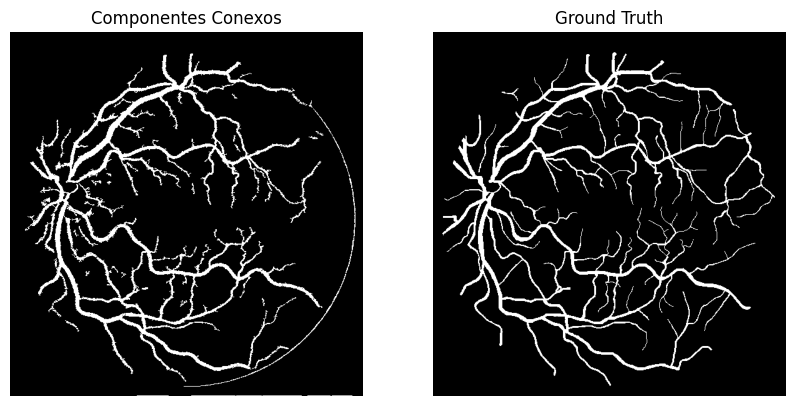

In [29]:
PostProces = cc.Conectivity(binarizada, min_size=20)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(PostProces, cmap='gray')
ax[0].set_title("Componentes Conexos")
ax[0].axis('off')

ax[1].imshow(gt_array, cmap='gray')
ax[1].set_title("Ground Truth")
ax[1].axis('off')

plt.show()

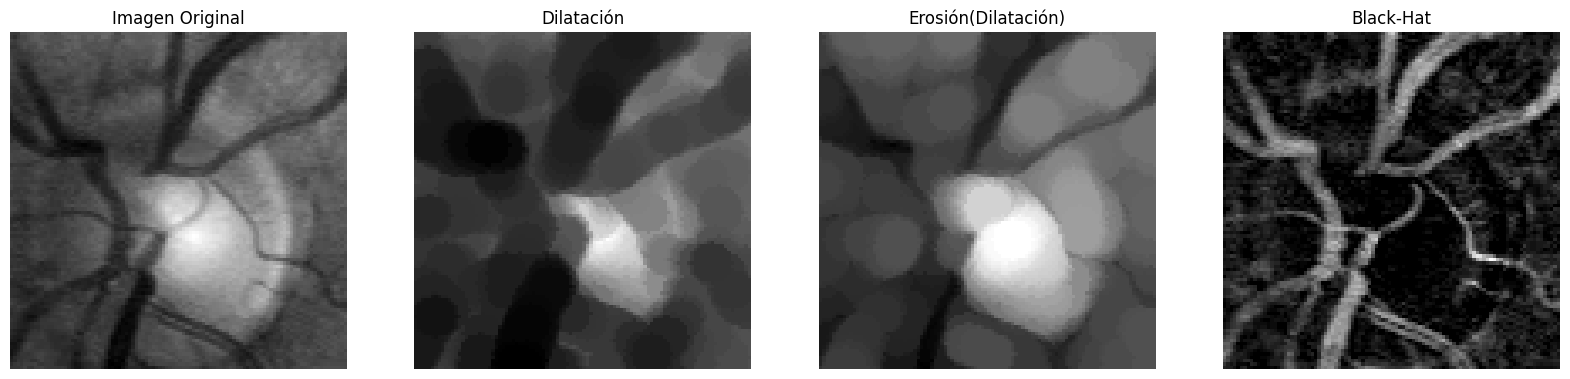

In [33]:
im_zoom = img_array[200:300, 50:150]
kernel2 = th.crea_kernel(13)
TopHat2 = th.BlackHat(im_zoom, kernel2)
erode2 = th.erosion(im_zoom, kernel2)
opened2 = th.dilatacion(erode2, kernel2)

th.vistas(im_zoom, erode2, opened2, TopHat2, names2)

El umbral fue 10.


(-0.5, 99.5, 99.5, -0.5)

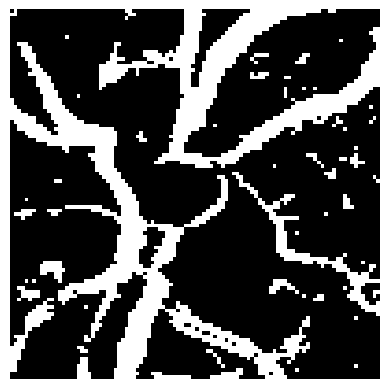

In [34]:
binarizada2 = ot.otsu_threshold(TopHat2)
plt.imshow(binarizada2, cmap='gray')
plt.axis('off')

(-0.5, 99.5, 99.5, -0.5)

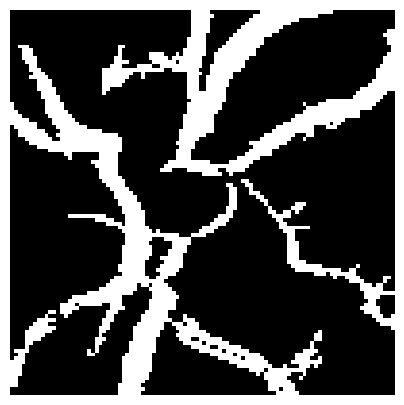

In [35]:
PostProces2 = cc.Conectivity(binarizada2, min_size=25)

plt.figure(figsize=(5, 5))
plt.imshow(PostProces2, cmap='gray')
plt.axis('off')